<a href="https://colab.research.google.com/github/hyunjin-C/hyunjin-C/blob/main/%5B1%5D%EC%88%9C%EC%B2%9C%ED%96%A5%EB%8C%80_MIMIC_Data_Statistics_211215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MIMIC-III데이터 실습 관련 코드입니다
###실습진행 순서
1. 데이터 통계 자료 만들기
2. 데이터 레이블링 코드 실습
3. 메디컬 스코어 계산 실습




###필요한 데이터들 다운 받기
1. 아래의 코드 블럭 실행
2. 실행 후 나오는 링크를 클릭

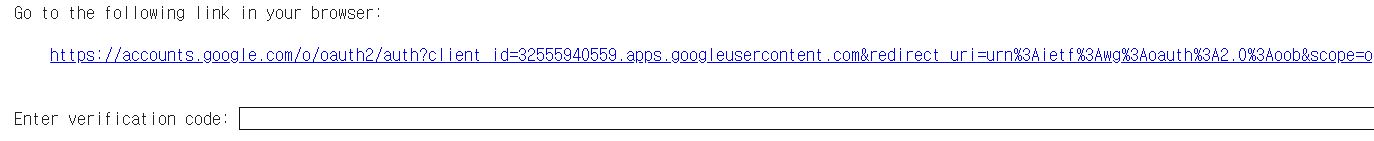
3. 로그인

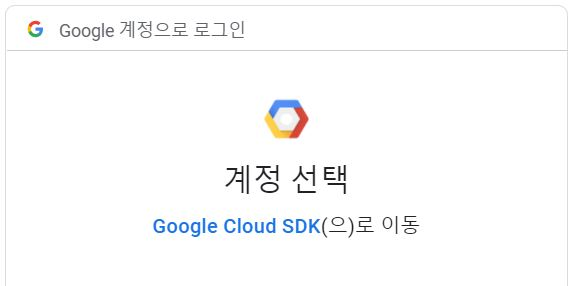
4. 허용 클릭

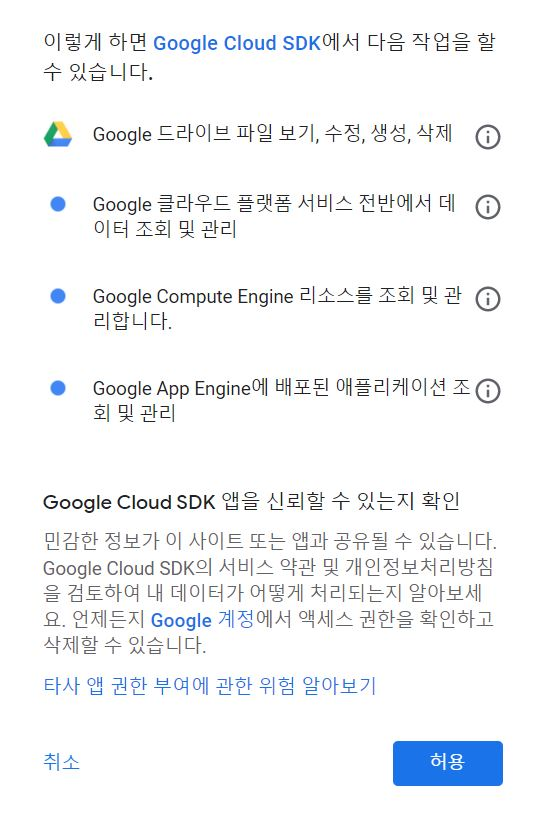
5. 코드 복사

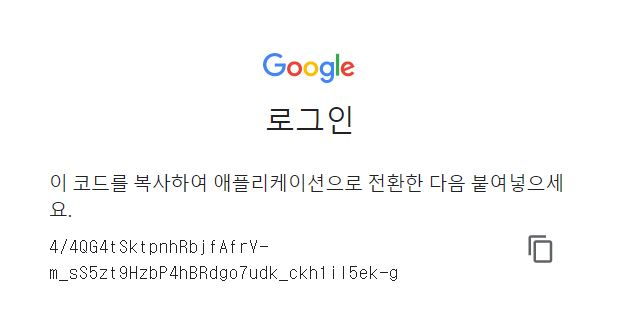
6. 코드 붙여넣기

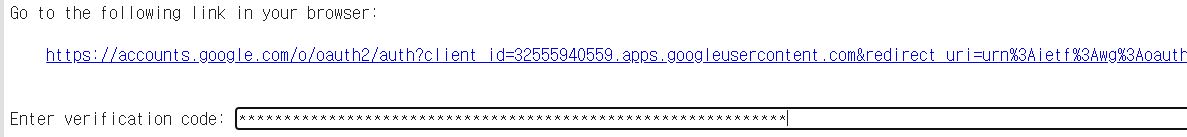

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from tqdm import tqdm

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
FILE_IDS = ["1-91Ad_3yQQ0T6ROnlxqbbgEFc6tiZAsY",
            "1-RbUxW2hF2ayWDhkMqGfKZvzEKwiLqQX",
            "1r76_XuYikaeswLAIpIbPpkx_kXgJob3a",
            "1-I25PxwI6qpDrNtDJD_jEnLl_MXh9hjH",
            "1-3YZEp8xFYplMjvFSfzb637WwA8OwW_2",
            "1-HhOwcDMse4BevovRkxOBICe5zZ3YraZ"]
FILE_NAMES = ['PATIENTS.csv', 'LABEVENTS.csv', 'CHARTEVENTS.csv',
              'D_ITEMS.csv', 'D_LABITEMS.csv', 'ADMISSIONS.csv']
for f_id, f_name in tqdm(zip(FILE_IDS, FILE_NAMES), desc="Download Files...", total=len(FILE_IDS), ncols=75):
  download_file = drive.CreateFile({'id': f_id})
  download_file.GetContentFile(f_name)

In [ ]:
#필요한 패키지들 import하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
patients = pd.read_csv('PATIENTS.csv')
print(patients.columns) #Print field names of PATIENTS.csv
print(patients[:5]) #Print first 5 rows of PATIENTS.csv
print(len(patients)) #Print the total number of rows in PATIENTS.csv

In [ ]:
chartevents = pd.read_csv('CHARTEVENTS.csv', low_memory=False)
print(chartevents.columns)
print(chartevents[:5])
total_rows_chartevents = len(chartevents)
print(total_rows_chartevents)

In [ ]:
labevents = pd.read_csv('LABEVENTS.csv', low_memory=False)
print(labevents.columns)
print(labevents[:5])
total_rows_labevents = len(labevents)
print(total_rows_labevents)

In [ ]:
admissions = pd.read_csv('ADMISSIONS.csv', low_memory=False)
print(admissions.columns)
print(admissions[:5])
print(len(admissions))

In [ ]:
d_items = pd.read_csv('D_ITEMS.csv', low_memory=False)
print(d_items.columns)
print(d_items[:5])
print(len(d_items))

In [ ]:
print(d_items[['ITEMID', 'LABEL']])

In [ ]:
#Heart rate의 ITEMID 확인해보기
d_items[d_items['LABEL'] == 'Heart Rate']

In [ ]:
##코드 실습
##아래의 항목들의 ITEMID를 확인해보세요
## "Respiratory Rate", "Arterial BP [Systolic]", "NBP [Systolic]", "Arterial Blood Pressure systolic"
## "Non Invasive Blood Pressure systolic", "ART BP Systolic	"
d_items[d_items['LABEL'].isin(["Respiratory Rate"])]

In [ ]:
d_items[d_items['LABEL'].astype(str).str.contains('Temp')] #Search labels that contain 'Temp' strings

In [ ]:
d_labitems = pd.read_csv('D_LABITEMS.csv', low_memory=False)
print(d_labitems.columns)
print(d_labitems[:5])
print(len(d_labitems))

In [ ]:
print(d_labitems[['ITEMID', 'LABEL']])

In [ ]:
##Bilirubin의 ITEMID 확인해보기
d_labitems[d_labitems['LABEL'] == "Bilirubin"]

In [ ]:
##코드 실습
##아래의 항목들의 ITEMID를 확인해보세요
## "Lactate", "pH", "Potassium", "Sodium"
d_labitems[d_labitems['LABEL'].isin(["Lactate", "pH", "Potassium", "Sodium"])]

##데이터 통계 자료 만들기

In [1]:
#ITEMID for some features
VITAL_SIGNS = {'PULSE': [220045, 211],
               'RESP': [220210, 618],
               'TEMP_C': [223762, 676, 677],
               'TEMP_F': [223761, 678, 679],
               'SBP': [220050, 220179, 225309, 51, 455],
               'DBP': [220051, 220180, 225310, 8368, 8441]
               }
LABS = {'BILIRUBIN': [50885],
        'LACTATE': [50813],
        'pH': [50820, 50831],
        'SODIUM': [50983],
        'POTASSIUM': [50971],
        'CREATININE': [50912],
        'WBC': [51301]
        }

In [ ]:
#Vital Sings
pulse = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['PULSE'])]['VALUENUM'].dropna()
resp = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['RESP'])]['VALUENUM'].dropna()
temp_c = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['TEMP_C'])]['VALUENUM'].dropna()
temp_f = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['TEMP_F'])]['VALUENUM'].dropna()
sbp = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['SBP'])]['VALUENUM'].dropna()
dbp = chartevents.loc[chartevents['ITEMID'].isin(VITAL_SIGNS['DBP'])]['VALUENUM'].dropna()

In [ ]:
#Lab Test
bilirubin = labevents.loc[labevents['ITEMID'].isin(LABS['BILIRUBIN'])]['VALUENUM'].dropna()
lactate = labevents.loc[labevents['ITEMID'].isin(LABS['LACTATE'])]['VALUENUM'].dropna()
ph = labevents.loc[labevents['ITEMID'].isin(LABS['pH'])]['VALUENUM'].dropna()
sodium = labevents.loc[labevents['ITEMID'].isin(LABS['SODIUM'])]['VALUENUM'].dropna()
potassium = labevents.loc[labevents['ITEMID'].isin(LABS['POTASSIUM'])]['VALUENUM'].dropna()
creatinine = labevents.loc[labevents['ITEMID'].isin(LABS['CREATININE'])]['VALUENUM'].dropna()
wbc = labevents.loc[labevents['ITEMID'].isin(LABS['WBC'])]['VALUENUM'].dropna()


In [ ]:
#Print Stats of Values
print('PULSE: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(pulse), np.max(pulse), np.mean(pulse), np.median(pulse)))
print('RESP: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(resp), np.max(resp), np.mean(resp), np.median(resp)))
print('SBP: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(sbp), np.max(sbp), np.mean(sbp), np.median(sbp)))


In [ ]:
#코드 실습
#Lab Test 항목들 중 일부의 최소, 최대, 평균값을 구해보세요.
print('WBC: MIN = {}, MAX = {}, MEAN = {:.3f}, MEDIAN = {}'.format(np.min(wbc), np.max(wbc), np.mean(wbc), np.median(wbc)))
norm_pulse = (pulse - np.min(pulse)) / (np.max(pulse) - np.min(pulse))
norm_ph = (ph - np.min(ph)) / (np.max(ph) - np.min(ph))
norm_wbc = (wbc - np.min(wbc)) / (np.max(wbc) - np.min(wbc))

In [ ]:
#Plot histogram of features
hist = plt.hist(norm_wbc)
plt.title('Histogram of Normalized WBC')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [ ]:
#실습코드
#다른 항목들의 히스토그램도 그려보세요.
hist = plt.hist(resp)
plt.title('Histogram of RESP')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

In [ ]:
#시계열 Plot해보기

HADM_ID = admissions['HADM_ID'].to_numpy()

resp_sample = chartevents.loc[(chartevents['HADM_ID'] == HADM_ID[3]) & chartevents['ITEMID'].isin(VITAL_SIGNS['RESP'])]['VALUENUM'].dropna().to_numpy()
print(resp_sample.shape)

line = plt.plot(resp_sample)
plt.title('Line Plot of RESP Sample')
plt.xlabel('Time')
plt.ylabel('RESP')
plt.show()

In [ ]:
#실습 코드
#다른 항목들도 시간에 따른 변화를 그래프로 그려보세요.
HADM_ID = admissions['HADM_ID'].to_numpy()

sbp_sample = chartevents.loc[(chartevents['HADM_ID'] == HADM_ID[500]) & chartevents['ITEMID'].isin(VITAL_SIGNS['SBP'])]['VALUENUM'].dropna().to_numpy()
print(sbp_sample.shape)

line = plt.plot(sbp_sample)
plt.title('Line Plot of SBP Sample')
plt.xlabel('Time')
plt.ylabel('SBP')
plt.show()